## What is E-Sports 

Esports is a type of sport that elevates video games competitions to "competitive level". Esports is a intellectural confrontation sport between people using electronic equipment as sports equipment. More than just entertainment, esports requires participants to possess a high level of thinking skills, reflexes, coordination and good team spirits. In esports, participants are usually professional players with high gaming skills who compete for prize money by signing up with specific teams and participating in esports tournaments on a regular basis. 

## Landscape of E-Sports

Video game culture has always included organized competitions, although they were mostly between amateurs until the late 2000s, when professional players began to participate and live broadcasting of these events became quite popular. Esports had become a major force in the video game business by the 2010s, when a large number of game developers actively designed and funded tournaments and other events.

## Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
esports = pd.read_csv("../data/ESport_Earnings.csv", encoding='latin-1')
# general = pd.read_csv("../data/GeneralEsportData.csv")

In [28]:
# There are some "Releaseyear" data invalid, so we need to remove them
esports = esports[esports['Releaseyear'] >= 1980]
esports.head()

,IdNo,TotalMoney,GameName,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear
0,613,310.00,Acceleration of SUGURI 2,Fighting Game,6,2,United States,310.00,2018
1,510,190075.61,Age of Empires,Strategy,246,95,Viet Nam,123408.43,1997
2,179,1492489.51,Age of Empires II,Strategy,956,576,China,174252.44,1999
3,177,68113.85,Age of Empires III,Strategy,106,76,United States,18523.52,2005
4,540,2668.00,Age of Empires Online,Strategy,16,7,Germany,1264.00,2011


In [ ]:
esports.describe()

## Performance of different games in E-Sports

### Popularity of different games 

Which game has the highest number of players and tournaments?

In [45]:
players = esports.groupby('GameName')['PlayerNo'].sum().sort_values(ascending=False)
tournaments = esports.groupby('GameName')['TournamentNo'].sum().sort_values(ascending=False)
print("The game which has the highest number of players is:", players.index[0])
print("The game which has the highest number of tournaments is:", tournaments.index[0])


The game which has the highest number of players is: Counter-Strike: Global Offensive
The game which has the highest number of tournaments is: StarCraft II


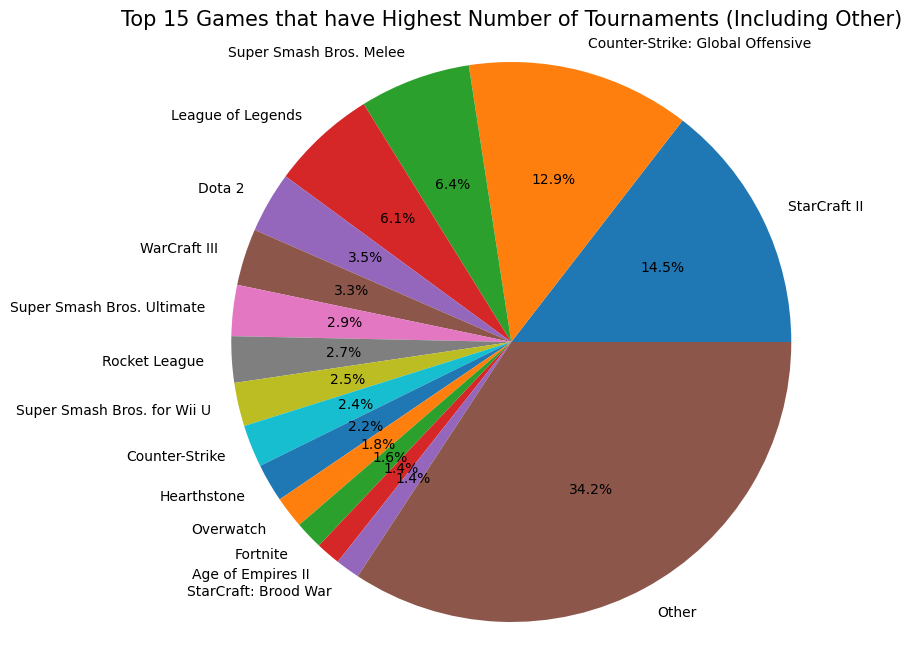

In [48]:
top_15_tournaments = tournaments.head(15)
other_tournaments_sum = tournaments.iloc[15:].sum()
top_15_tournaments['Other'] = other_tournaments_sum

plt.figure(figsize=(10, 8))
plt.pie(top_15_tournaments, labels=top_15_tournaments.index, autopct='%1.1f%%')
plt.title('Top 15 Games that have Highest Number of Tournaments (Including Other)', fontsize = 15)
plt.axis('equal')  
plt.show()


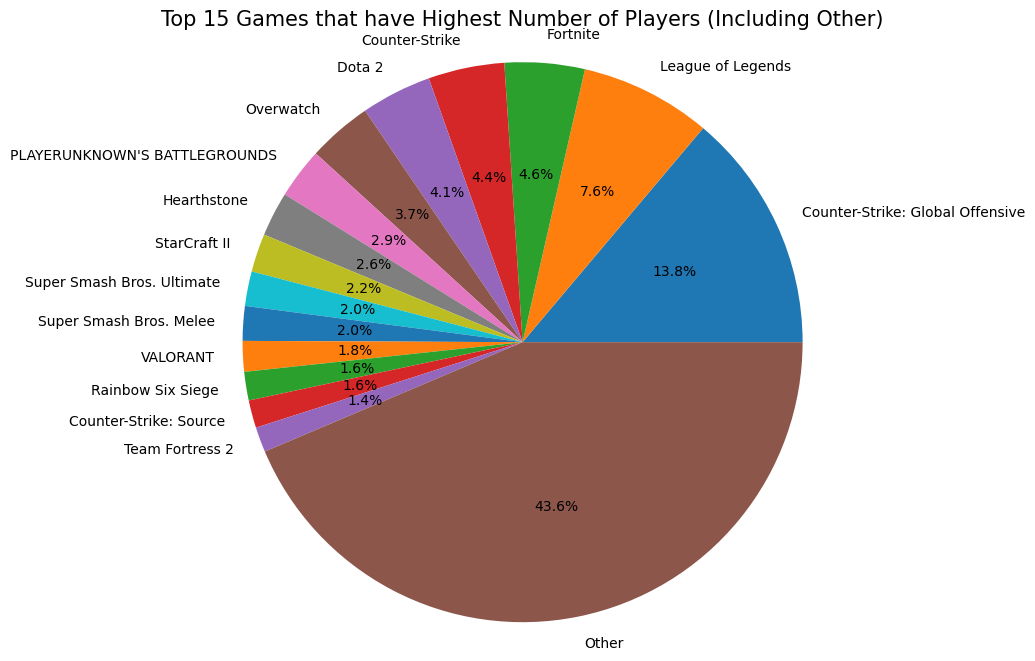

In [47]:
top_15_players = players.head(15)
other_players = players.iloc[15:].sum()
top_15_players['Other'] = other_players

plt.figure(figsize=(10, 8))
plt.pie(top_15_players, labels=top_15_players.index, autopct='%1.1f%%')
plt.title('Top 15 Games that have Highest Number of Players (Including Other)', fontsize = 15)
plt.axis('equal')  
plt.show()

### Prize pools in tournaments

Which game has the highest total prize money?


In [49]:
money = esports.groupby('GameName')['TotalMoney'].sum().sort_values(ascending=False)
print("The game with the highest total prize money is:", money.index[0])

The game with the highest total prize money is: Dota 2


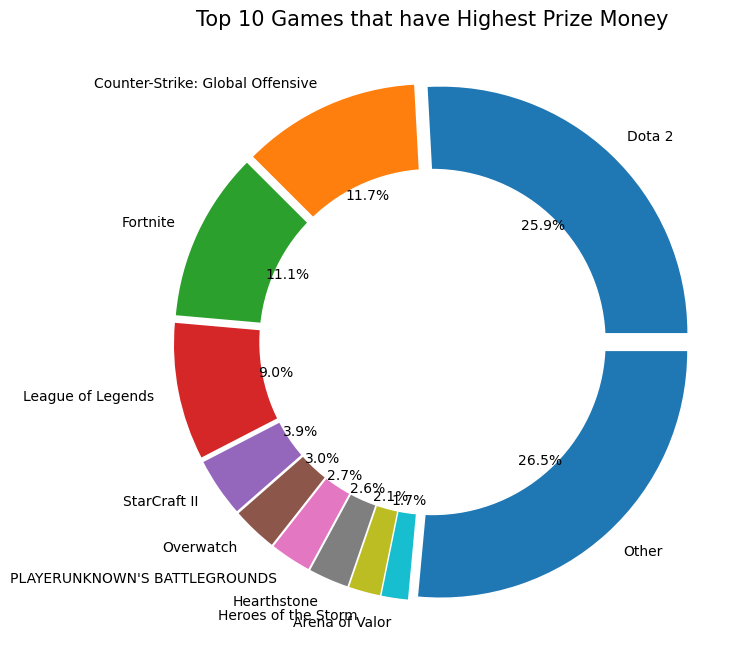

In [59]:
top_money = money.head(10)
other_money = money.iloc[10:].sum()
top_money['Other'] = other_money

explode = [0.05] * len(top_money)
plt.figure(figsize=(10, 8))
circle = plt.Circle((0,0),0.7, color = 'white')
plt.pie(top_money, labels = top_money.index, autopct = '%1.1f%%', explode = explode)
plt.title('Top 10 Games that have Highest Prize Money', fontsize = 15)
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()


How does the prize money vary across different game genres?

In [ ]:
genre_money = esports.groupby('Genre')['TotalMoney'].sum()

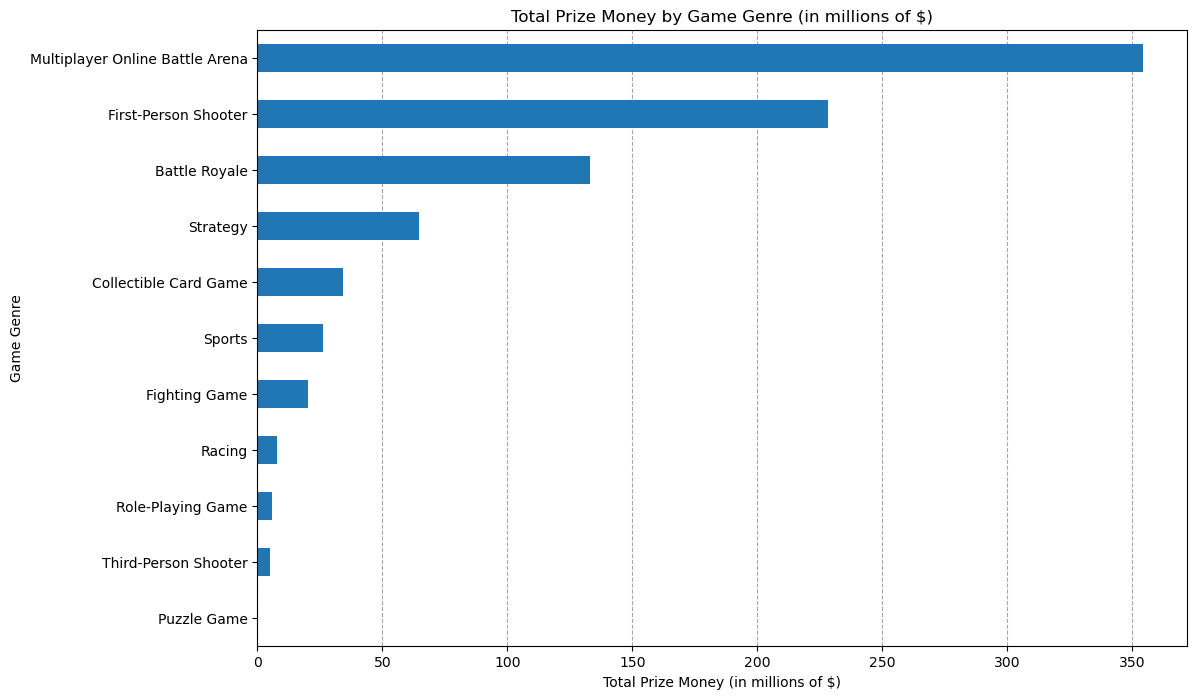

In [72]:
plt.figure(figsize=(12, 8))
(genre_money / 1e6).sort_values().plot(kind='barh')

plt.title('Total Prize Money by Game Genre (in millions of $)')
plt.xlabel('Total Prize Money (in millions of $)')
plt.ylabel('Game Genre')

ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_axisbelow(True)
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)

plt.show()


In [ ]:
# data = pd.merge(esports, general, left_on=['GameName', 'Genre', 'Releaseyear'], 
#                 right_on=['Game','Genre', 'ReleaseDate'], how='inner')
# data = data.drop(['IdNo', 'Game', 'ReleaseDate'], axis = 1)
# data.head()